In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [3]:
pais = ["Brazil"]
df_filtrado = df[df["Entity"].isin(pais)]

In [4]:
# Verificando se está pegando o pais de escolha
print(df_filtrado.head())

       Entity Code  year         Day  Average surface temperature daily  \
24480  Brazil  BRA  1940  1940-01-15                          24.304272   
24481  Brazil  BRA  1940  1940-02-15                          24.305620   
24482  Brazil  BRA  1940  1940-03-15                          24.284336   
24483  Brazil  BRA  1940  1940-04-15                          23.796352   
24484  Brazil  BRA  1940  1940-05-15                          23.440235   

       Average surface temperature monthly  
24480                            24.232492  
24481                            24.232492  
24482                            24.232492  
24483                            24.232492  
24484                            24.232492  


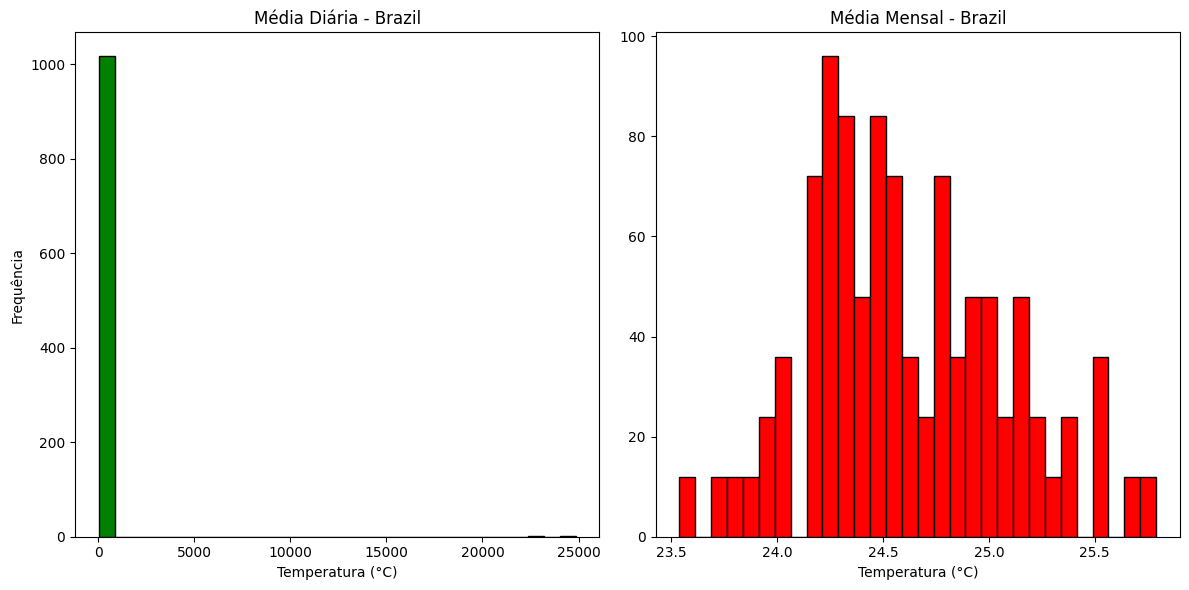

In [5]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Brazil", df_filtrado)

In [6]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'], 1.5)
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'], 1.5)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 24558    22855.000000
24677       21.772010
24906       21.690779
24972    24822.000000
24980    24843.000000
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 Series([], Name: Average surface temperature monthly, dtype: float64)


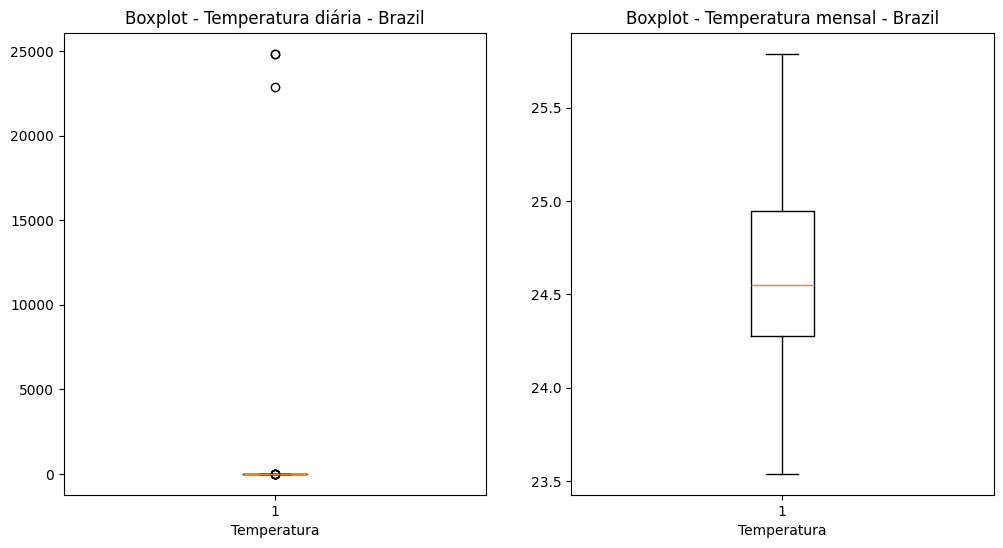

In [7]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Brazil", df_filtrado)

In [8]:
# Importar método de remover outliers
from Funcoes import remover_outliers

# Remover outliers
temperatura_diaria_correta = remover_outliers(df_filtrado['Average surface temperature daily'], 1.5)
temperatura_mensal_correta = remover_outliers(df_filtrado['Average surface temperature monthly'], 1.5)

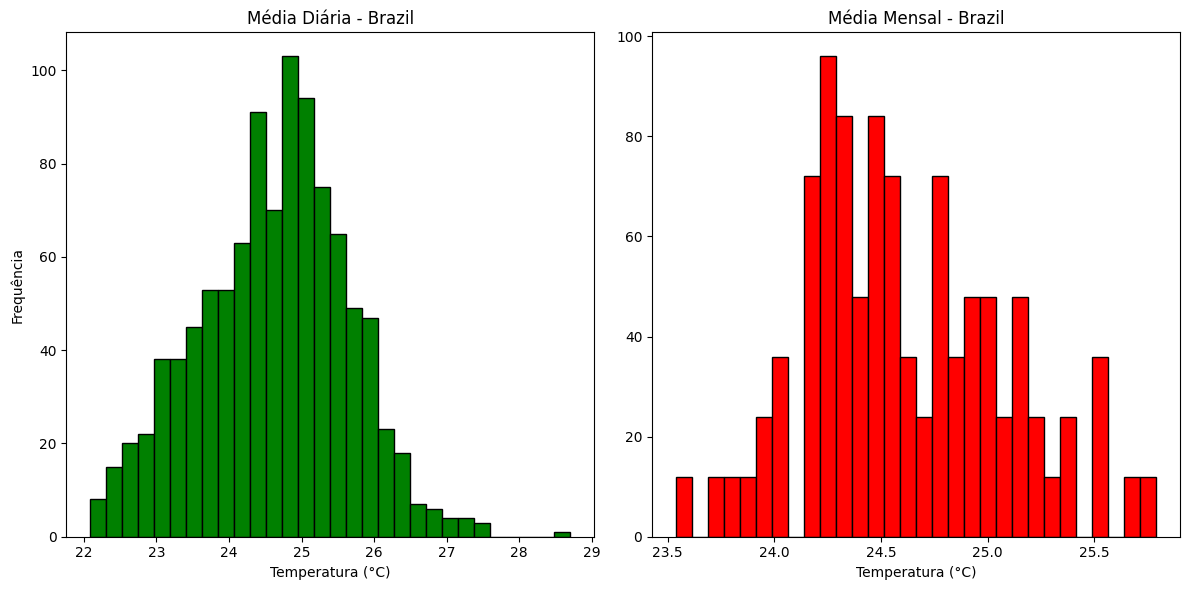

In [9]:
# Criar dataframe com os dados sem outliers
dados_pais_correto = pd.DataFrame({
    'Entity': 'Brazil',
    'Day': df_filtrado['Day'],
    'Average surface temperature daily': temperatura_diaria_correta,
    'Average surface temperature monthly': temperatura_mensal_correta
})

dados_pais_correto['Day'] = pd.to_datetime(dados_pais_correto['Day'])

# Gerar histograma do pais selecionado sem outliers
gerar_histogramas('Brazil', dados_pais_correto)

In [ ]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

analisar_periodo(dados_pais_correto, 'Day')



Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12


In [13]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(dados_pais_correto)

Numero de meses faltante: 0
Meses faltante: 


PeriodIndex([], dtype='period[M]')